### Assignment 7

Noah Lanai - 9808252192 - 18h

Carl Hjalmarsson - 9305198930 - 18h

In [1]:
# imports
from __future__ import print_function
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11501568/11490434 [==============================] - 0s 0us/step


**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)


### Question 1
The image data for the train and test sets are integers, which means that integer division applies. Dividing by 255 would then discard the fractional part of the values.

We divide by 255 since the MNIST data set consists of images represented in grayscale as numbers between 0 and 255. In order to simplify calculations, which speeds up learning and leads to faster convergence, we normalize data so that each value $x_{ij} \in [0,1]$.

The ```to_categorical()``` method converts the class vectors of ```y_train``` and ```y_test``` to a binary matrix. This is done because of the output of the last layer will be one scalar value from each of the ten neurons for each image, where the scalar value is a measurement of how much a specific number they think the image contains. The propagation is done in batches, which is why the output will have the format of ```[batch_size, num_classes]```. In order to compare this output to the labels and calculate the loss when using categorical crossentropy, the labels need to have the same dimensions, i.e. one row for each image in the batch and one column for each category (read class).


In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Question 2
### a)
The model has three layers with $64+64+10 = 138$ neurons. 

The ReLu activation function is used for the first two layers. This is appropriate for this application as we have many neurons firing between each layer, and the main advantage of ReLU is that it does not activate all the neurons at the same time, making it computationally efficient. It also has better gradient propagation as it is piecewise linear; since we are dealing with numbers between 0 and 1, the gradient can become very small also known as *vanishing gradient* issues, causing the weights not to be updated when backpropagating. This in turn leads to stagnated learning. Other activation functions such as the sigmoid has exponential terms that makes is much more vulnerable to *vanishing gradient* issues. 

The last layer uses the softmax activation function, which transforms the input values into values between 0 and 1, hence $x_{ij} \in [0,1]$, and returns a vector of the probability distribution for each class. The softmax function will in this purpose return the value with the highest probability that will be classified as one of the integers marked in the num_classes binary matrix.

The number of parameters used in the network is the number of weights and the number of biases for each layer: $64^2 + 64*10 + 2 = 4738$ (the hyperparameters are the learning rate, batch size and number of epochs).

The input layers have the dimensions 64. This is because the set of pixels on the pictures are 28x28 which is 784. This number is large and is reduced to 64 by clustering some of the pixels together. The output layer is 10 because the pictures are classified in 10 different classes, in this case the integers from 0-9.

### b)
The loss function used to train the network is categorical cross entropy, expressed mathematically as 
$$
C = -\sum_{1}^{num\_classes} y_i·\log ŷ_i,
$$
where $ŷ_i$ is the i:th scalar value of the model output and $y_i$ is the scalar value of the label corresponding to the output.

In order to explain how to interpret this mathematical definition, we give a simple example. Take two arrays; the first corresponding to the model output after propagating one image through the network, the second the image label data:
$$
S = 
\begin{bmatrix}
0.7 \\ 0.2 \\ 0.05 \\ 0.05
\end{bmatrix}\quad\quad\quad
L = \begin{bmatrix}
1.0 \\ 0.0 \\ 0.0 \\ 0.0
\end{bmatrix}.
$$
The first element of S is $ŷ_0$, and the first element of L is $y_0$. Inserting these into the cost function gives the first term of the sum. This term is $1.0·\log(0.7)$ which is a negative number. Continuing for the remaining elements of both arrays, we compute a sum where the values of each term lie between $[-\infty, 0]$. The negative term before the sum makes sure that the value of the cost function is positive and it is thus lower bounded, meaning that there exists a global minimum. Basically, each term is multiplied by the scalar value of the label corresponding to the image. For our first term, the first element of array L indicates that this is the true class of the image, and this scalar value is then weighted by the corresponding logaritmized prediction probability. If the probability tends to 1, the cost for this term tends to zero, otherwise there is a cost associated with it. Conversely, if the probability tends to zero the cost tends to infinity.

It is appropriate for the problem because for each image we classify, the loss function is a measure of the error of the classification. When classifying the next image, the weights are changed by optimization of the loss function. So for each image we classify, we will get more accurate weight, hence improving the classification of the integers.

### c)

Epoch 1/10
469/469 [==============================] - 7s 9ms/step - loss: 0.4558 - accuracy: 0.8715 - val_loss: 0.2640 - val_accuracy: 0.9209
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2251 - accuracy: 0.9345 - val_loss: 0.1882 - val_accuracy: 0.9428
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1753 - accuracy: 0.9486 - val_loss: 0.1627 - val_accuracy: 0.9518
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1454 - accuracy: 0.9571 - val_loss: 0.1417 - val_accuracy: 0.9570
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1232 - accuracy: 0.9644 - val_loss: 0.1283 - val_accuracy: 0.9617
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1071 - accuracy: 0.9687 - val_loss: 0.1111 - val_accuracy: 0.9661
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0957 - accuracy: 0.9717 - val_loss: 0.1030 - val_accuracy: 0.9683
Epoch 

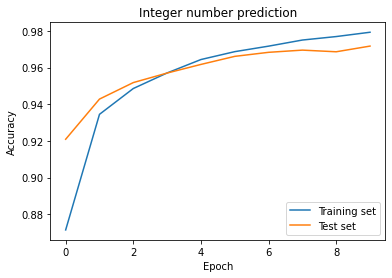

In [ ]:
fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('Integer number prediction')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()

### d)

In [ ]:
## Define model ##
epochs = 40
w_decay = np.linspace(1e-6, 1e-3, 5)
replicates = 3

val_accuracy = np.zeros((5,3))
mean = np.zeros(5)
std = np.zeros(5)

def build_model(kernel_regularizer):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(500, kernel_regularizer=kernel_regularizer, activation = 'relu'))
  model.add(Dense(300, kernel_regularizer=kernel_regularizer, activation = 'relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(lr = 0.1),
          metrics=['accuracy'])
  return model
  

for i in range(len(w_decay)):
  kernel_regularizer = tf.keras.regularizers.l2(w_decay[i])
  for j in range(replicates):
    model = build_model(kernel_regularizer)
    fit_info = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    val_accuracy[i, j] = score[1]

  #print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3951 - accuracy: 0.8896 - val_loss: 0.2099 - val_accuracy: 0.9397
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1874 - accuracy: 0.9462 - val_loss: 0.1553 - val_accuracy: 0.9535
Epoch 3/40
469/469 [==============================] - 3s 5ms/step - loss: 0.1372 - accuracy: 0.9604 - val_loss: 0.1223 - val_accuracy: 0.9631
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1084 - accuracy: 0.9686 - val_loss: 0.1104 - val_accuracy: 0.9658
Epoch 5/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0882 - accuracy: 0.9752 - val_loss: 0.0974 - val_accuracy: 0.9698
Epoch 6/40
469/469 [==============================] - 3s 5ms/step - loss: 0.0746 - accuracy: 0.9791 - val_loss: 0.0876 - val_accuracy: 0.9728
Epoch 7/40
469/469 [==============================] - 3s 5ms/step - loss: 0.0631 - accuracy: 0.9819 - val_loss: 0.0773 - val_accuracy: 0.9762
Epoch 

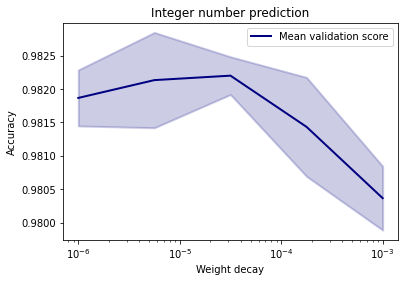

Maximum validation accuracy achieved: 0.9821999867757162


In [ ]:
# Plot inspired by: https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py
param_range = np.logspace(-6, -3, 5)
mean = np.mean(val_accuracy, axis=1)
std = np.std(val_accuracy, axis=1)

plt.semilogx(
    param_range, mean, label="Cross-validation score", color="navy", lw=2
)
plt.fill_between(
    param_range,
    mean - std,
    mean + std,
    alpha=0.2,
    color="navy",
    lw=2,
)
plt.title('Integer number prediction')
plt.ylabel('Accuracy')
plt.xlabel('Weight decay')
plt.legend(['Mean validation score'], loc='upper right')
plt.show()

print("Maximum validation accuracy achieved:", max(mean))

#### Analysis of results
Our validation accuracy is approximately 0.0025 lower than Geoff Hinton's results, which is very close; the relative error between the results is 0.25%. It's hard to argue which factors makes up the difference as it is so small, however one factor of note that differs between our and Hinton's model is that Hinton uses 50 epochs as well as conjugate gradient descent. Another factor is the choice of learning rate, which we were unable to find when reviewing Hinton's publicly available material.


### Question 3
### a)

In [5]:
## Source code found at https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086
model = Sequential()
epochs = 50
## Padding for training and test data

x_train_pad = tf.pad(tf.convert_to_tensor(x_train), tf.constant([[0,0], [2,2], [2, 2], [0, 0]]), mode="CONSTANT")
x_test_pad = tf.pad(tf.convert_to_tensor(x_test), tf.constant([[0,0], [2,2], [2, 2], [0, 0]]), mode="CONSTANT")

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), padding = "same"))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'])

fit_info = model.fit(x_train_pad, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test_pad, y_test))
score = model.evaluate(x_test_pad, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
469/469 [==============================] - 7s 13ms/step - loss: 0.4986 - accuracy: 0.8515 - val_loss: 0.1474 - val_accuracy: 0.9556
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1307 - accuracy: 0.9603 - val_loss: 0.1272 - val_accuracy: 0.9583
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0919 - accuracy: 0.9718 - val_loss: 0.0853 - val_accuracy: 0.9713
Epoch 4/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0729 - accuracy: 0.9780 - val_loss: 0.0716 - val_accuracy: 0.9779
Epoch 5/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0595 - val_accuracy: 0.9805
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0590 - val_accuracy: 0.9817
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0562 - val_accuracy: 0.9816
Epo

#### Discussion
### a)

We choose to use the method Lenet5. This method has a known accuracy of 98-99%. The input layer of Lenet5 requires 32x32 pixel images. To be able to use this we convert the 28x28 images to 32x32 by padding the data. The Lenet5 contains of seven different layers. Three convolutional layers, two subsampling layers and two fully connected layers. The convolutional layers apply filters to the images to learn properties of a set of neighbouring neurons. The subsampling layers are used to downscale the dimensions of the filters, using average pooling, where the average of each patch of the feature map is calculated. Each subsampling layer is taking away half of the size of the filter batch.  

### b)
The advantage of using convolutional layers in this case is that each filter has the properties of the neighbouring neurons. This means that the neurons in each filter are only affected by the neighbouring neurons, in contrast to fully connected layers where every neuron is connected to each other. In the sense of image recognition, it is good to use convolutional layers since a filter property can appear all around the image. Let’s say there is a small car in each of the images. The car appears at different places for each image. The convolutional filter senses that it is a car no matter where it is placed in the picture. If fully connected layers where used it only sees properties of each pixel and would not recognize the car everywhere.